DATA CLEANING DUPLICATES

In [1]:
import pandas as pd

data = ["satu", "satu", "dua", "tiga", "empat"]
series = pd.Series(data)
series

0     satu
1     satu
2      dua
3     tiga
4    empat
dtype: object

In [2]:
series.duplicated()

0    False
1     True
2    False
3    False
4    False
dtype: bool

In [3]:
series.duplicated(keep = "last")

0     True
1    False
2    False
3    False
4    False
dtype: bool

In [4]:
series.duplicated(keep = False)

0     True
1     True
2    False
3    False
4    False
dtype: bool

In [5]:
series.drop_duplicates()

0     satu
2      dua
3     tiga
4    empat
dtype: object

In [6]:
series.drop_duplicates(keep = "last")

1     satu
2      dua
3     tiga
4    empat
dtype: object

In [7]:
series.drop_duplicates(keep = False)

2      dua
3     tiga
4    empat
dtype: object

In [8]:
frame = {
    "name" : ["agung", "emik", "agung", "fafa", "william"],
    "course" : ["analis", "marketing", "analis", "statistik", "analis"]
}

df = pd.DataFrame(frame)
df

,name,course
0,agung,analis
1,emik,marketing
2,agung,analis
3,fafa,statistik
4,william,analis


In [9]:
df.duplicated()

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [10]:
df.duplicated(subset=["course", "name"])

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [11]:
df

,name,course
0,agung,analis
1,emik,marketing
2,agung,analis
3,fafa,statistik
4,william,analis


In [12]:
df = df.set_index("name")
df

,course
name,
agung,analis
emik,marketing
agung,analis
fafa,statistik
william,analis


COMBINING DATA

In [13]:
data_2017 = pd.read_csv("user_age_2017.csv")
data_2018 = pd.read_csv("user_age_2018.csv")

data_2017

,userid,date
0,7,1/1/2017
1,8,1/2/2017
2,9,1/3/2017


In [14]:
data_2018

,userid,date
0,11,1/1/2018
1,12,1/2/2018
2,13,1/3/2018


In [15]:
data_combine = pd.concat([data_2017, data_2018])
data_combine

,userid,date
0,7,1/1/2017
1,8,1/2/2017
2,9,1/3/2017
0,11,1/1/2018
1,12,1/2/2018
2,13,1/3/2018


In [16]:
data_combine = pd.concat([data_2017, data_2018], ignore_index=True)
data_combine

,userid,date
0,7,1/1/2017
1,8,1/2/2017
2,9,1/3/2017
3,11,1/1/2018
4,12,1/2/2018
5,13,1/3/2018


BINNING DATA

In [17]:
data_combine["date"] = pd.to_datetime(data_combine["date"])
data_combine

,userid,date
0,7,2017-01-01
1,8,2017-01-02
2,9,2017-01-03
3,11,2018-01-01
4,12,2018-01-02
5,13,2018-01-03


In [18]:
from datetime import datetime

tanggal = datetime.now()

data_combine["age"] = (tanggal - data_combine["date"]).dt.days

data_combine

,userid,date,age
0,7,2017-01-01,2882
1,8,2017-01-02,2881
2,9,2017-01-03,2880
3,11,2018-01-01,2517
4,12,2018-01-02,2516
5,13,2018-01-03,2515


In [19]:
bins = [0, 2560, 2900]

labels = ['< 2600 day', '2600 to 2900 day']

data_combine['age_bin'] = pd.cut(data_combine['age'], bins = bins, labels = labels)

data_combine

,userid,date,age,age_bin
0,7,2017-01-01,2882,2600 to 2900 day
1,8,2017-01-02,2881,2600 to 2900 day
2,9,2017-01-03,2880,2600 to 2900 day
3,11,2018-01-01,2517,< 2600 day
4,12,2018-01-02,2516,< 2600 day
5,13,2018-01-03,2515,< 2600 day


ASSIGNMENT

In [20]:
data = pd.read_csv("netflix_titles-1.csv")
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s24,Movie,Go! Go! Cory Carson: Chrissy Takes the Wheel,"Alex Woo, Stanley Moore","Maisie Benson, Paul Killam, Kerry Gudjohnsen, ...",NaN,"September 21, 2021",2021,TV-Y,61 min,Children & Family Movies,From arcade games to sled days and hiccup cure...
...,...,...,...,...,...,...,...,...,...,...,...,...
103,s20,TV Show,Jaguar,NaN,"Blanca Suárez, Iván Marcos, Óscar Casas, Adriá...",NaN,"September 22, 2021",2021,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...","In the 1960s, a Holocaust survivor joins a gro..."
104,s96,TV Show,The Circle,NaN,Michelle Buteau,"United States, United Kingdom","September 8, 2021",2021,TV-MA,3 Seasons,Reality TV,Status and strategy collide in this social exp...
105,s97,Movie,If I Leave Here Tomorrow: A Film About Lynyrd ...,Stephen Kijak,"Ronnie Van Zandt, Gary Rossington, Allen Colli...",United States,"September 7, 2021",2018,TV-MA,97 min,"Documentaries, Music & Musicals","Using interviews and archival footage, this do..."
106,s98,TV Show,Kid Cosmic,NaN,"Jack Fisher, Tom Kenny, Amanda C. Miller, Kim ...",United States,"September 7, 2021",2021,TV-Y7,2 Seasons,"Kids' TV, TV Comedies, TV Sci-Fi & Fantasy",A boy's superhero dreams come true when he fin...


In [21]:
data = data.set_index("show_id")
data

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s24,Movie,Go! Go! Cory Carson: Chrissy Takes the Wheel,"Alex Woo, Stanley Moore","Maisie Benson, Paul Killam, Kerry Gudjohnsen, ...",NaN,"September 21, 2021",2021,TV-Y,61 min,Children & Family Movies,From arcade games to sled days and hiccup cure...
...,...,...,...,...,...,...,...,...,...,...,...
s20,TV Show,Jaguar,NaN,"Blanca Suárez, Iván Marcos, Óscar Casas, Adriá...",NaN,"September 22, 2021",2021,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...","In the 1960s, a Holocaust survivor joins a gro..."
s96,TV Show,The Circle,NaN,Michelle Buteau,"United States, United Kingdom","September 8, 2021",2021,TV-MA,3 Seasons,Reality TV,Status and strategy collide in this social exp...
s97,Movie,If I Leave Here Tomorrow: A Film About Lynyrd ...,Stephen Kijak,"Ronnie Van Zandt, Gary Rossington, Allen Colli...",United States,"September 7, 2021",2018,TV-MA,97 min,"Documentaries, Music & Musicals","Using interviews and archival footage, this do..."


In [22]:
data.duplicated()

show_id
s1     False
s2     False
s3     False
s4     False
s24    False
       ...  
s20     True
s96    False
s97    False
s98    False
s99    False
Length: 108, dtype: bool

In [23]:
data.drop_duplicates()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s24,Movie,Go! Go! Cory Carson: Chrissy Takes the Wheel,"Alex Woo, Stanley Moore","Maisie Benson, Paul Killam, Kerry Gudjohnsen, ...",NaN,"September 21, 2021",2021,TV-Y,61 min,Children & Family Movies,From arcade games to sled days and hiccup cure...
...,...,...,...,...,...,...,...,...,...,...,...
s95,Movie,Show Dogs,Raja Gosnell,"Will Arnett, Ludacris, Natasha Lyonne, Stanley...","United Kingdom, United States","September 8, 2021",2018,PG,90 min,"Children & Family Movies, Comedies",A rough and tough police dog must go undercove...
s96,TV Show,The Circle,NaN,Michelle Buteau,"United States, United Kingdom","September 8, 2021",2021,TV-MA,3 Seasons,Reality TV,Status and strategy collide in this social exp...
s97,Movie,If I Leave Here Tomorrow: A Film About Lynyrd ...,Stephen Kijak,"Ronnie Van Zandt, Gary Rossington, Allen Colli...",United States,"September 7, 2021",2018,TV-MA,97 min,"Documentaries, Music & Musicals","Using interviews and archival footage, this do..."


DATA VISUALIZATION

MATPLOTLIB

In [24]:
jantung = pd.read_csv("penyakit_jantung.csv")
source = jantung[["sex", "age", "cp", "trestbps", "chol"]]
source.head()

,sex,age,cp,trestbps,chol
0,female,63,3,145,233
1,female,37,2,130,250
2,male,41,1,130,204
3,female,56,1,120,236
4,male,57,0,120,354


In [25]:
group = source.groupby("age")["age"].count()
group.head()

age
29    1
34    2
35    4
37    2
38    3
Name: age, dtype: int64

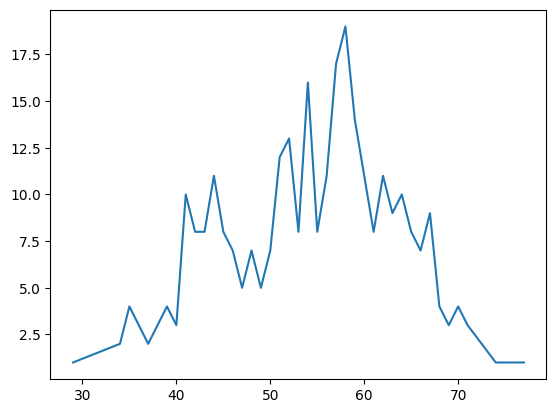

In [26]:
import matplotlib.pyplot as plt

plt.plot(group.index, group.values)
plt.show()

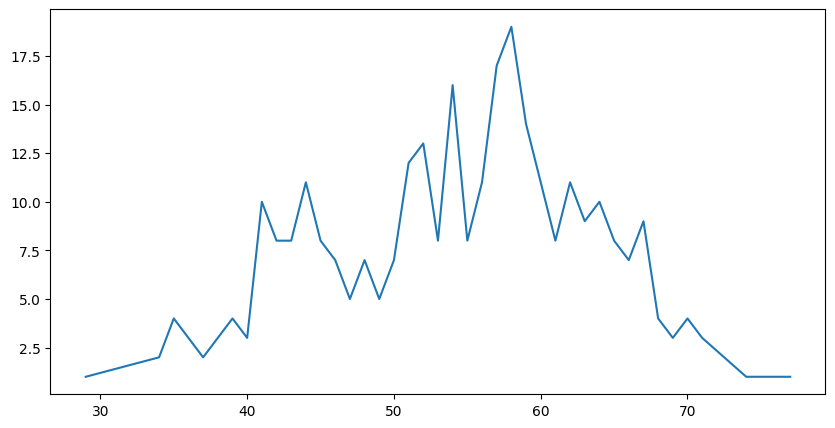

In [27]:
plt.figure(figsize=(10,5))
plt.plot(group.index, group.values)
plt.show()

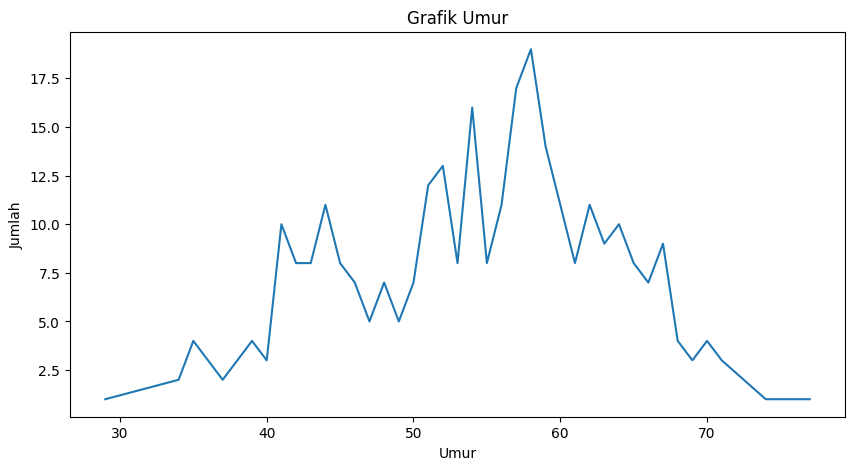

In [28]:
plt.figure(figsize=(10,5))
plt.plot(group.index, group.values)
plt.title("Grafik Umur")
plt.ylabel("Jumlah")
plt.xlabel("Umur")
plt.show()

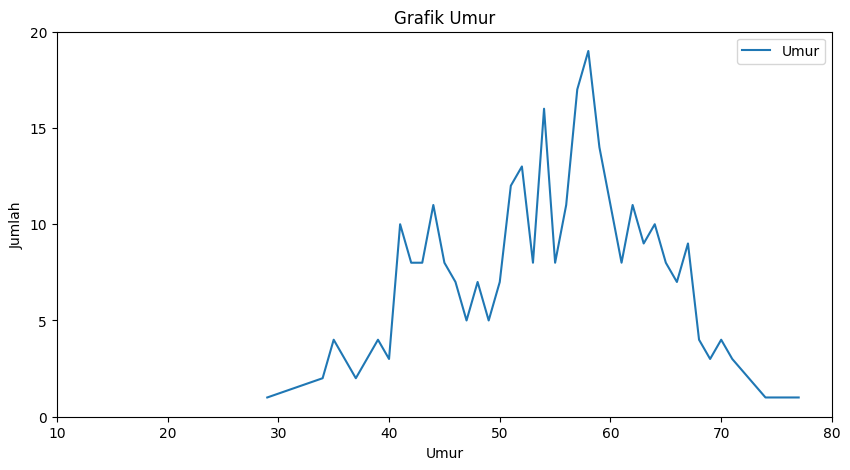

In [29]:
plt.figure(figsize=(10,5))
plt.plot(group.index, group.values, label = "Umur")
plt.title("Grafik Umur")
plt.ylabel("Jumlah")
plt.xlabel("Umur")
plt.yticks([0, 5, 10, 15, 20])
plt.xticks([10, 20, 30, 40, 50, 60, 70, 80])
plt.legend()
plt.show()

In [30]:
gender = source.groupby("sex")["sex"].count()
gender.head()

sex
female    207
male       96
Name: sex, dtype: int64

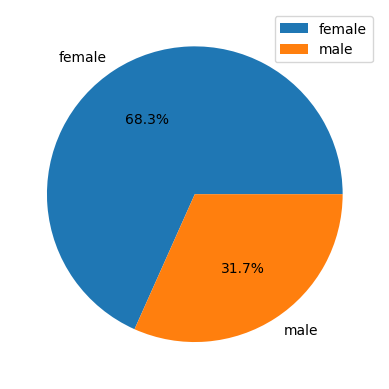

In [31]:
plt.pie(gender.values, labels = gender.index, autopct="%1.1f%%")

plt.legend()
plt.show()

SEABORN

In [32]:
import seaborn as sns

In [33]:
source

,sex,age,cp,trestbps,chol
0,female,63,3,145,233
1,female,37,2,130,250
2,male,41,1,130,204
3,female,56,1,120,236
4,male,57,0,120,354
...,...,...,...,...,...
298,male,57,0,140,241
299,female,45,3,110,264
300,female,68,0,144,193
301,female,57,0,130,131


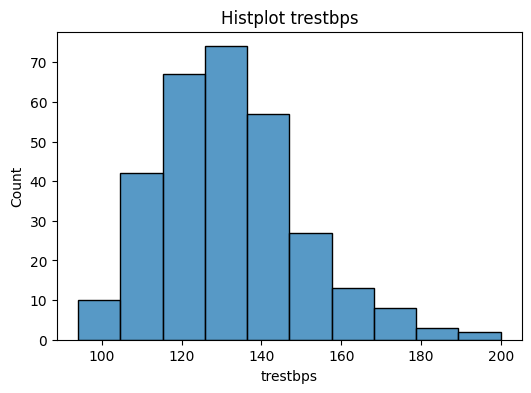

In [34]:
plt.figure(figsize=[6,4])
sns.histplot(x = "trestbps", data = source, bins = 10)
plt.title("Histplot trestbps")
plt.show()

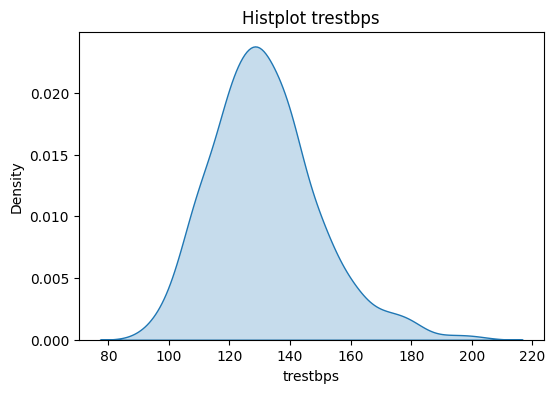

In [35]:
plt.figure(figsize=[6,4])
sns.kdeplot(x = "trestbps", data = source, fill=True)
plt.title("Histplot trestbps")
plt.show()

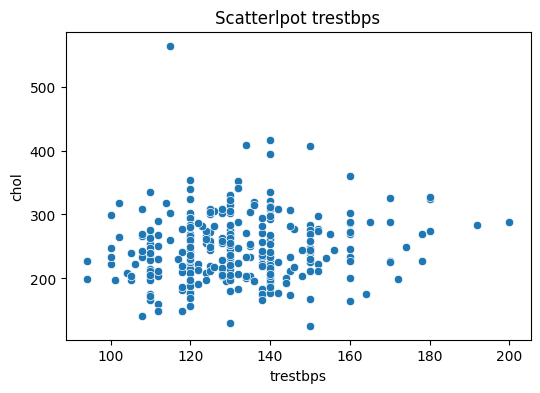

In [36]:
plt.figure(figsize=[6,4])
sns.scatterplot(x = "trestbps", y = "chol" ,data = source)
plt.title("Scatterlpot trestbps")
plt.show()

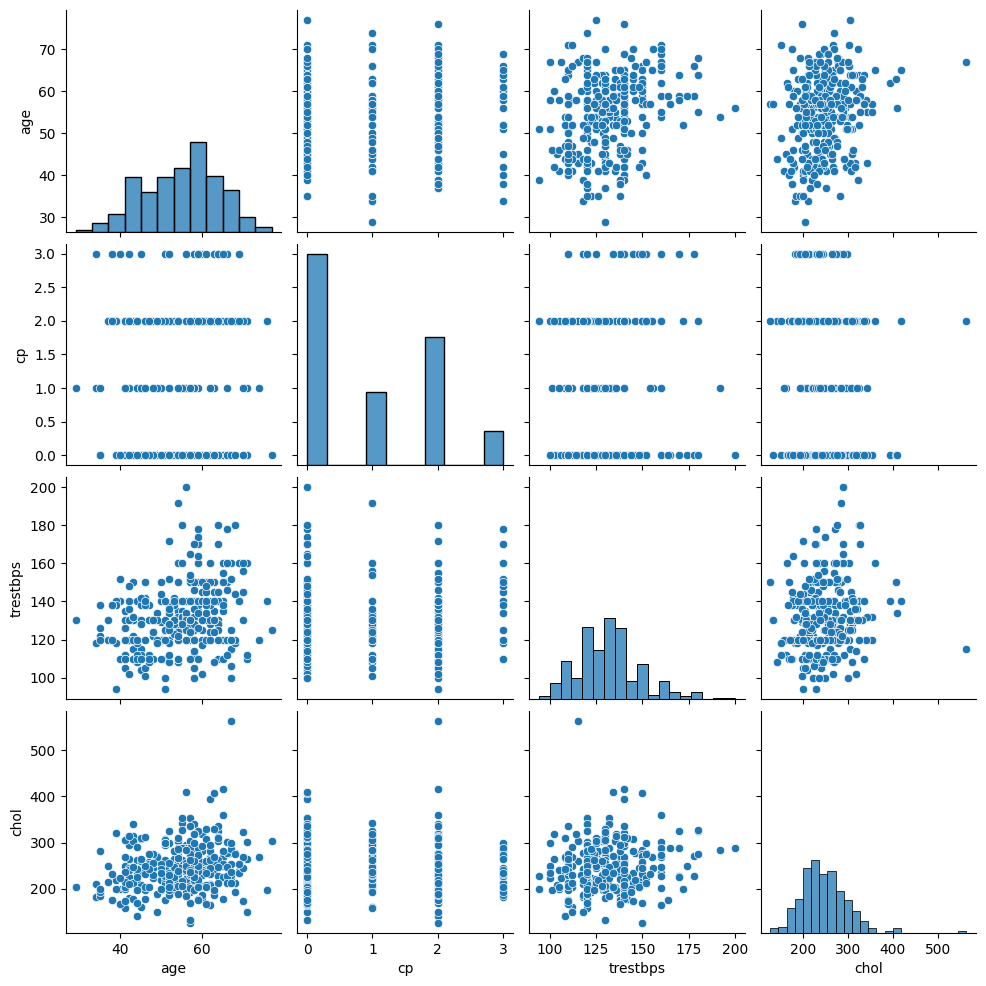

In [37]:
sns.pairplot(data = source)
plt.show()

In [38]:
source

,sex,age,cp,trestbps,chol
0,female,63,3,145,233
1,female,37,2,130,250
2,male,41,1,130,204
3,female,56,1,120,236
4,male,57,0,120,354
...,...,...,...,...,...
298,male,57,0,140,241
299,female,45,3,110,264
300,female,68,0,144,193
301,female,57,0,130,131


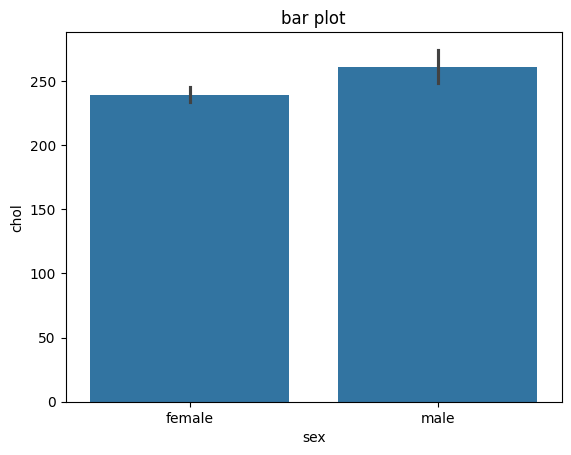

In [39]:
sns.barplot(x = "sex", y = "chol", data = source)
plt.title("bar plot")
plt.show()

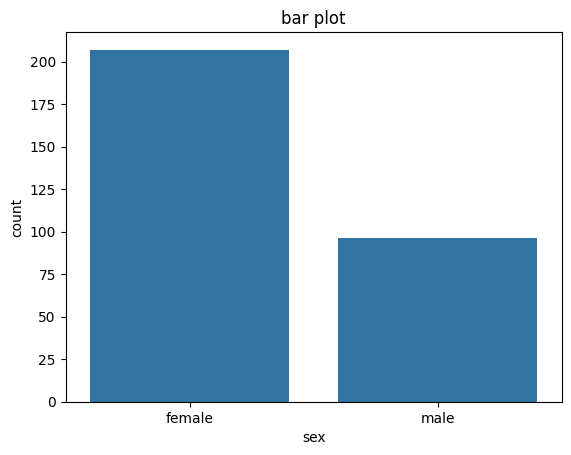

In [40]:
sns.countplot(x = "sex", data = source)
plt.title("bar plot")
plt.show()

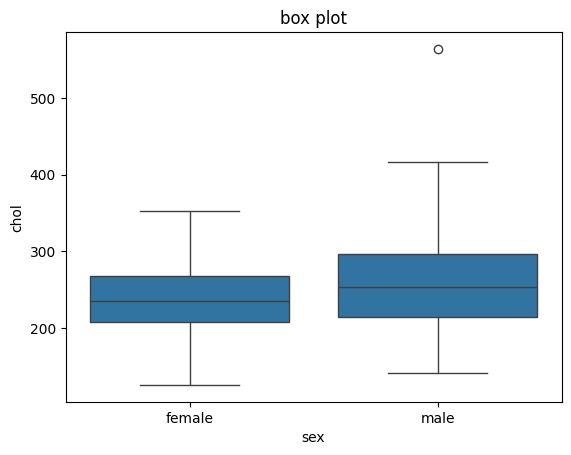

In [41]:
sns.boxplot(x = "sex", y = "chol", data = source)
plt.title("box plot")
plt.show()

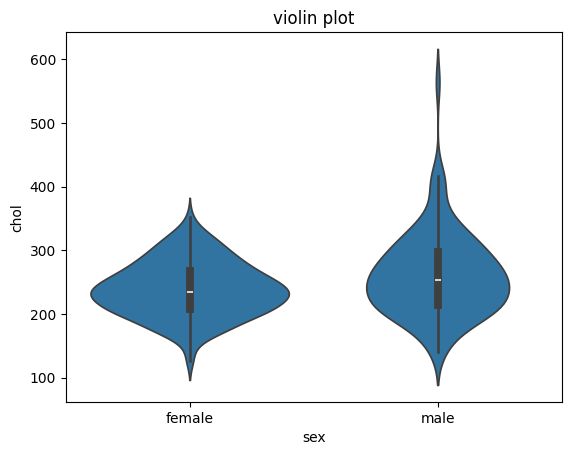

In [42]:
sns.violinplot(x = "sex", y = "chol", data = source)
plt.title("violin plot")
plt.show()

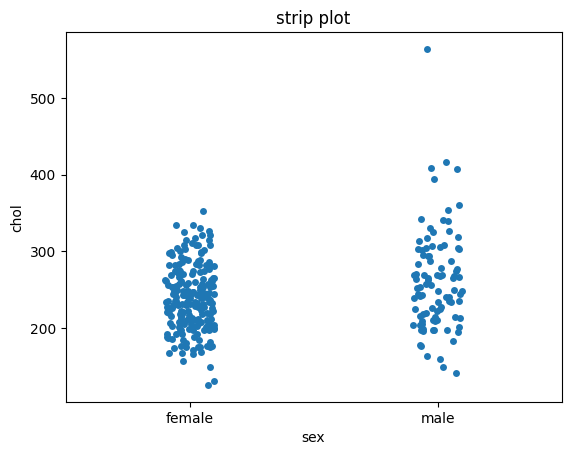

In [43]:
sns.stripplot(x = "sex", y = "chol", data = source)
plt.title("strip plot")
plt.show()

In [44]:
pivot = source.pivot_table(index = "sex", columns = "age", values = "chol")
pivot = pivot.fillna(0)
pivot

age,29,34,35,37,38,39,40,41,42,43,...,65,66,67,68,69,70,71,74,76,77
sex,,,,,,,,,,,,,,,,,,,,,
female,204.0,182.0,224.0,250.0,193.666667,270.0,196.333333,205.166667,250.0,250.0,...,240.25,247.0,252.833333,248.0,244.0,252.5,0.000000,0.0,0.0,304.0
male,0.0,210.0,183.0,215.0,0.000000,209.5,0.000000,244.000000,237.0,277.0,...,317.75,244.0,354.666667,211.0,239.0,0.0,238.666667,269.0,197.0,0.0


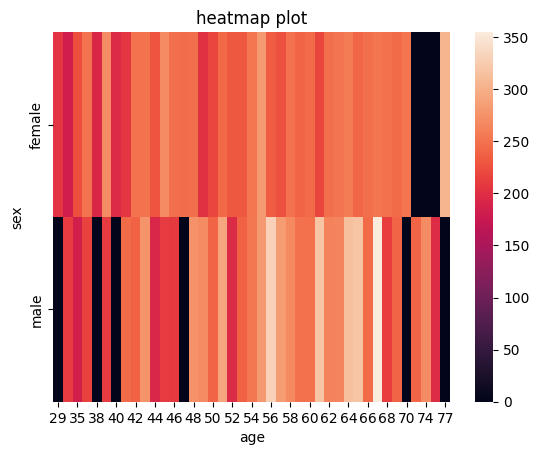

In [45]:
sns.heatmap(pivot)
plt.title("heatmap plot")
plt.show()

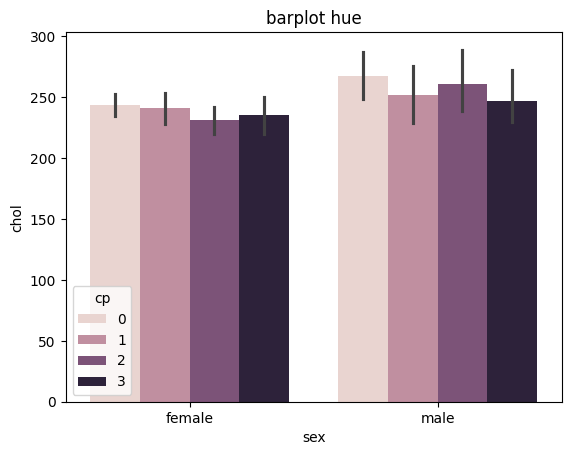

In [46]:
sns.barplot(x = "sex", y = "chol", hue = "cp", data = source)
plt.title("barplot hue")
plt.show()

ASSIGNMENT

In [47]:
data = pd.read_csv("netflix_titles-1.csv")
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s24,Movie,Go! Go! Cory Carson: Chrissy Takes the Wheel,"Alex Woo, Stanley Moore","Maisie Benson, Paul Killam, Kerry Gudjohnsen, ...",NaN,"September 21, 2021",2021,TV-Y,61 min,Children & Family Movies,From arcade games to sled days and hiccup cure...
...,...,...,...,...,...,...,...,...,...,...,...,...
103,s20,TV Show,Jaguar,NaN,"Blanca Suárez, Iván Marcos, Óscar Casas, Adriá...",NaN,"September 22, 2021",2021,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...","In the 1960s, a Holocaust survivor joins a gro..."
104,s96,TV Show,The Circle,NaN,Michelle Buteau,"United States, United Kingdom","September 8, 2021",2021,TV-MA,3 Seasons,Reality TV,Status and strategy collide in this social exp...
105,s97,Movie,If I Leave Here Tomorrow: A Film About Lynyrd ...,Stephen Kijak,"Ronnie Van Zandt, Gary Rossington, Allen Colli...",United States,"September 7, 2021",2018,TV-MA,97 min,"Documentaries, Music & Musicals","Using interviews and archival footage, this do..."
106,s98,TV Show,Kid Cosmic,NaN,"Jack Fisher, Tom Kenny, Amanda C. Miller, Kim ...",United States,"September 7, 2021",2021,TV-Y7,2 Seasons,"Kids' TV, TV Comedies, TV Sci-Fi & Fantasy",A boy's superhero dreams come true when he fin...


1

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       108 non-null    object
 1   type          108 non-null    object
 2   title         108 non-null    object
 3   director      67 non-null     object
 4   cast          97 non-null     object
 5   country       62 non-null     object
 6   date_added    108 non-null    object
 7   release_year  108 non-null    int64 
 8   rating        108 non-null    object
 9   duration      108 non-null    object
 10  listed_in     108 non-null    object
 11  description   108 non-null    object
dtypes: int64(1), object(11)
memory usage: 10.3+ KB


In [49]:
data["date_added"] = pd.to_datetime(data["date_added"])
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s24,Movie,Go! Go! Cory Carson: Chrissy Takes the Wheel,"Alex Woo, Stanley Moore","Maisie Benson, Paul Killam, Kerry Gudjohnsen, ...",NaN,2021-09-21,2021,TV-Y,61 min,Children & Family Movies,From arcade games to sled days and hiccup cure...
...,...,...,...,...,...,...,...,...,...,...,...,...
103,s20,TV Show,Jaguar,NaN,"Blanca Suárez, Iván Marcos, Óscar Casas, Adriá...",NaN,2021-09-22,2021,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...","In the 1960s, a Holocaust survivor joins a gro..."
104,s96,TV Show,The Circle,NaN,Michelle Buteau,"United States, United Kingdom",2021-09-08,2021,TV-MA,3 Seasons,Reality TV,Status and strategy collide in this social exp...
105,s97,Movie,If I Leave Here Tomorrow: A Film About Lynyrd ...,Stephen Kijak,"Ronnie Van Zandt, Gary Rossington, Allen Colli...",United States,2021-09-07,2018,TV-MA,97 min,"Documentaries, Music & Musicals","Using interviews and archival footage, this do..."
106,s98,TV Show,Kid Cosmic,NaN,"Jack Fisher, Tom Kenny, Amanda C. Miller, Kim ...",United States,2021-09-07,2021,TV-Y7,2 Seasons,"Kids' TV, TV Comedies, TV Sci-Fi & Fantasy",A boy's superhero dreams come true when he fin...


In [50]:
data[['release_year']].describe()

,release_year
count,108.000000
mean,2015.462963
std,9.893287
min,1975.000000
25%,2013.000000
50%,2021.000000
75%,2021.000000
max,2021.000000


2

In [51]:
group = data.groupby("release_year")["type"].count()
group

release_year
1975     1
1978     1
1983     1
1987     1
1993     1
1994     1
1996     1
1997     1
1998     1
2001     2
2002     1
2003     1
2004     2
2005     1
2006     1
2007     1
2008     1
2009     1
2010     2
2011     1
2012     2
2013     3
2014     2
2015     1
2017     2
2018     5
2019     2
2020     8
2021    60
Name: type, dtype: int64

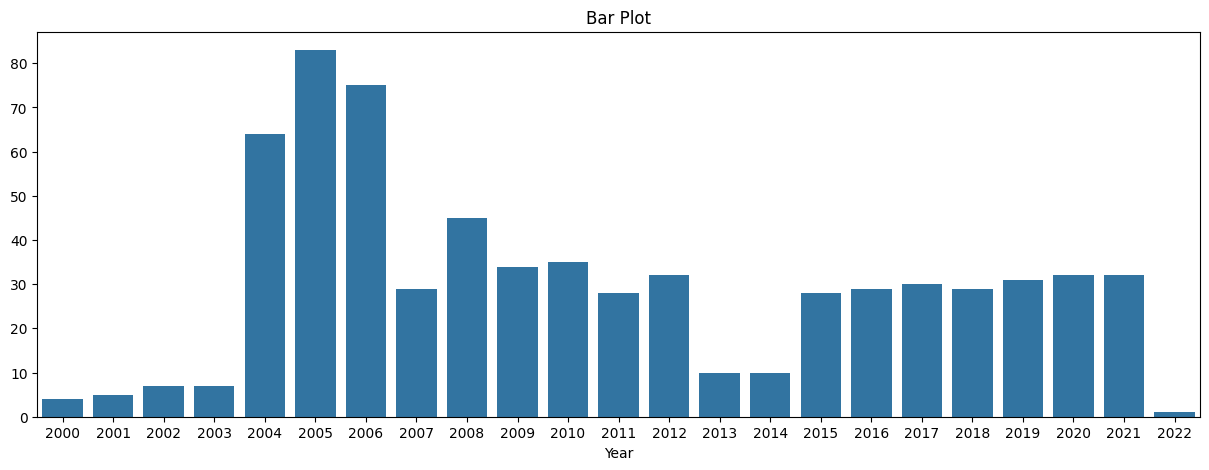

In [66]:
plt.figure(figsize=[15,5])
sns.barplot(x = group.index, y = group.values)
plt.title("Bar Plot")
plt.show()

3

In [53]:
tahun_2018 = data.loc[(data["type"] == "Movie") & (data["release_year"] == 2018)]
tahun_2018

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
79,s74,Movie,King of Boys,Kemi Adetiba,"Sola Sobowale, Adesua Etomi, Remilekun ""Remini...",Nigeria,2021-09-14,2018,TV-MA,182 min,"Dramas, International Movies",When a powerful businesswoman’s political ambi...
101,s95,Movie,Show Dogs,Raja Gosnell,"Will Arnett, Ludacris, Natasha Lyonne, Stanley...","United Kingdom, United States",2021-09-08,2018,PG,90 min,"Children & Family Movies, Comedies",A rough and tough police dog must go undercove...
105,s97,Movie,If I Leave Here Tomorrow: A Film About Lynyrd ...,Stephen Kijak,"Ronnie Van Zandt, Gary Rossington, Allen Colli...",United States,2021-09-07,2018,TV-MA,97 min,"Documentaries, Music & Musicals","Using interviews and archival footage, this do..."


4

In [54]:
data["date_added_month"] = data["date_added"].dt.strftime("%m")
data["date_added_day"] = data["date_added"].dt.strftime("%d")
data["date_added_year"] = data["date_added"].dt.strftime("%Y")
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_month,date_added_day,date_added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",09,25,2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",09,24,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,09,24,2021
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",09,24,2021
4,s24,Movie,Go! Go! Cory Carson: Chrissy Takes the Wheel,"Alex Woo, Stanley Moore","Maisie Benson, Paul Killam, Kerry Gudjohnsen, ...",NaN,2021-09-21,2021,TV-Y,61 min,Children & Family Movies,From arcade games to sled days and hiccup cure...,09,21,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,s20,TV Show,Jaguar,NaN,"Blanca Suárez, Iván Marcos, Óscar Casas, Adriá...",NaN,2021-09-22,2021,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...","In the 1960s, a Holocaust survivor joins a gro...",09,22,2021
104,s96,TV Show,The Circle,NaN,Michelle Buteau,"United States, United Kingdom",2021-09-08,2021,TV-MA,3 Seasons,Reality TV,Status and strategy collide in this social exp...,09,08,2021
105,s97,Movie,If I Leave Here Tomorrow: A Film About Lynyrd ...,Stephen Kijak,"Ronnie Van Zandt, Gary Rossington, Allen Colli...",United States,2021-09-07,2018,TV-MA,97 min,"Documentaries, Music & Musicals","Using interviews and archival footage, this do...",09,07,2021
106,s98,TV Show,Kid Cosmic,NaN,"Jack Fisher, Tom Kenny, Amanda C. Miller, Kim ...",United States,2021-09-07,2021,TV-Y7,2 Seasons,"Kids' TV, TV Comedies, TV Sci-Fi & Fantasy",A boy's superhero dreams come true when he fin...,09,07,2021


ASSIGNMENT SEABORN

1

In [55]:
import pandas as pd

data = pd.read_csv("Cause-of-Death-Indonesia.csv")
data

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
0,Abrasi Air Laut,Bencana Alam,2012,1,0,Profil Kesehatan Indonesia Tahun 2012,Lampiran 3.38,https://pusdatin.kemkes.go.id/download.php?fil...
1,AIDS,Bencana Non Alam dan Penyakit,2000,1,47,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
2,AIDS,Bencana Non Alam dan Penyakit,2001,1,99,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
3,AIDS,Bencana Non Alam dan Penyakit,2002,1,100,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
4,AIDS,Bencana Non Alam dan Penyakit,2003,1,261,Profil Kesehatan Indonesia Tahun 2010,115,https://pusdatin.kemkes.go.id/download.php?fil...
...,...,...,...,...,...,...,...,...
675,Wabah Penyakit (Epidemi),Bencana Non Alam dan Penyakit,2016,1,0,Profil Kesehatan Indonesia Tahun 2016,Lampiran 6.37,https://pusdatin.kemkes.go.id/download.php?fil...
676,Wabah Penyakit (Epidemi),Bencana Non Alam dan Penyakit,2017,1,0,Profil Kesehatan Indonesia Tahun 2017,Lampiran 6.43,https://pusdatin.kemkes.go.id/download.php?fil...
677,Wabah Penyakit (Epidemi),Bencana Non Alam dan Penyakit,2019,1,0,Profil Kesehatan Indonesia Tahun 2019,Lampiran 63.c,https://pusdatin.kemkes.go.id/download.php?fil...
678,Wabah Penyakit (Epidemi),Bencana Non Alam dan Penyakit,2020,1,0,Profil Kesehatan Indonesia Tahun 2020,191,https://pusdatin.kemkes.go.id/download.php?fil...


In [56]:
group = data.groupby("Year")["Total Deaths"].count()
group

Year
2000     4
2001     5
2002     7
2003     7
2004    64
2005    83
2006    75
2007    29
2008    45
2009    34
2010    35
2011    28
2012    32
2013    10
2014    10
2015    28
2016    29
2017    30
2018    29
2019    31
2020    32
2021    32
2022     1
Name: Total Deaths, dtype: int64

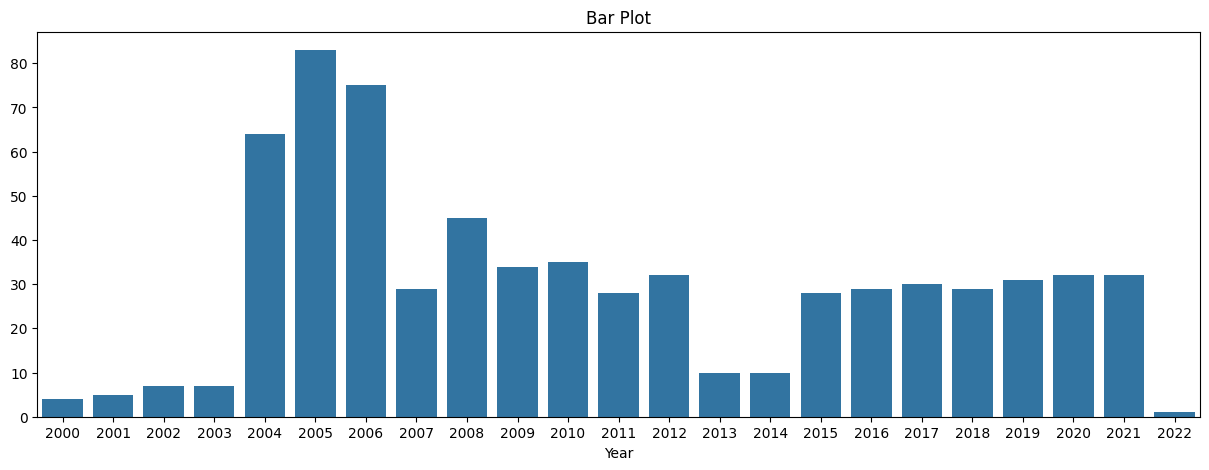

In [58]:
plt.figure(figsize=[15,5])
sns.barplot(x = group.index, y = group.values)
plt.title("Bar Plot")
plt.show()

In [72]:
x = group.index
y = group.values

max_index = x[y.argmax()]
max_value = y.max()

print(f"Bar dengan nilai terbanyak ada pada tahun : {max_index} dengan nilai : {max_value}")

Bar dengan nilai terbanyak ada pada tahun : 2005 dengan nilai : 83


2

In [103]:
data = pd.read_csv("Cause-of-Death-Indonesia.csv")
data

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
0,Abrasi Air Laut,Bencana Alam,2012,1,0,Profil Kesehatan Indonesia Tahun 2012,Lampiran 3.38,https://pusdatin.kemkes.go.id/download.php?fil...
1,AIDS,Bencana Non Alam dan Penyakit,2000,1,47,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
2,AIDS,Bencana Non Alam dan Penyakit,2001,1,99,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
3,AIDS,Bencana Non Alam dan Penyakit,2002,1,100,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
4,AIDS,Bencana Non Alam dan Penyakit,2003,1,261,Profil Kesehatan Indonesia Tahun 2010,115,https://pusdatin.kemkes.go.id/download.php?fil...
...,...,...,...,...,...,...,...,...
675,Wabah Penyakit (Epidemi),Bencana Non Alam dan Penyakit,2016,1,0,Profil Kesehatan Indonesia Tahun 2016,Lampiran 6.37,https://pusdatin.kemkes.go.id/download.php?fil...
676,Wabah Penyakit (Epidemi),Bencana Non Alam dan Penyakit,2017,1,0,Profil Kesehatan Indonesia Tahun 2017,Lampiran 6.43,https://pusdatin.kemkes.go.id/download.php?fil...
677,Wabah Penyakit (Epidemi),Bencana Non Alam dan Penyakit,2019,1,0,Profil Kesehatan Indonesia Tahun 2019,Lampiran 63.c,https://pusdatin.kemkes.go.id/download.php?fil...
678,Wabah Penyakit (Epidemi),Bencana Non Alam dan Penyakit,2020,1,0,Profil Kesehatan Indonesia Tahun 2020,191,https://pusdatin.kemkes.go.id/download.php?fil...


In [104]:
data = data.loc[data['Type'] == 'Bencana Alam']
print(data)

                        Cause          Type  Year  Data Redundancy  \
0             Abrasi Air Laut  Bencana Alam  2012                1   
23              Angin kencang  Bencana Alam  2008                1   
24       Angin Puting Beliung  Bencana Alam  2008                1   
25       Angin Puting Beliung  Bencana Alam  2015                1   
26       Angin Puting Beliung  Bencana Alam  2016                1   
..                        ...           ...   ...              ...   
665                   Tsunami  Bencana Alam  2019                1   
666                   Tsunami  Bencana Alam  2020                1   
667                   Tsunami  Bencana Alam  2021                1   
668     Tsunami Aceh (Hilang)  Bencana Alam  2004                1   
669  Tsunami Aceh (Meninggal)  Bencana Alam  2004                1   

     Total Deaths                                 Source Page at Source  \
0               0  Profil Kesehatan Indonesia Tahun 2012  Lampiran 3.38   
23       

In [105]:
data = data.groupby('Cause')['Total Deaths'].sum()
print(data)

Cause
Abrasi Air Laut                                                      0
Angin Puting Beliung                                               100
Angin Siklon Tropis                                                 37
Angin Topan                                                          0
Angin Topan / Angin Puting Beliung / Angin Puyuh                    19
Angin kencang                                                        3
Angin siklon tropis (angin kencang dan angin puting beliung)         4
Banjir                                                             758
Banjir Bandang                                                    1148
Banjir Bandang dan Angin Siklon Tropis                               0
Banjir Bandang dan Tanah Longsor                                     2
Banjir Lahar Dingin                                                 12
Banjir dan Tanah Longsor                                           664
Banjir disertai Tanah Longsor                                       40


In [127]:
import seaborn as sns

sns.barplot(
    data = data.groupby
    x='Total Deaths',
    y='Cause',
    order=df.sort_values('Total Deaths', ascending=False)['Cause']
)

plt.title('Total Deaths By Cause')
plt.xlabel('Total Deaths')
plt.ylabel('Cause')
plt.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3198564850.py, line 4)